In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

set_default(figsize=(10, 10), dpi=100)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
N = 1000 # Number of examples
C = 4    # Number of classes
D = 2    # Number of dimesnsions

h = 100    # hiden units

In [5]:
X = torch.zeros((N*C), D)
y = torch.zeros((N*C), dtype=torch.long)

for cl in range(C):
    t  = torch.linspace(0, 1, N)
    th = (2*np.pi/C)*(2*t+cl-1) + torch.randn(N)*0.2
    
    X[:,0][cl*N:(cl+1)*N] = t*np.sin(th) 
    X[:,1][cl*N:(cl+1)*N] = t*np.cos(th)
    y[cl*N:(cl+1)*N] = cl
    
print("Shapes:")
print("X:", tuple(X.size())) 
print("y:", tuple(y.size()))

Shapes:
X: (4000, 2)
y: (4000,)


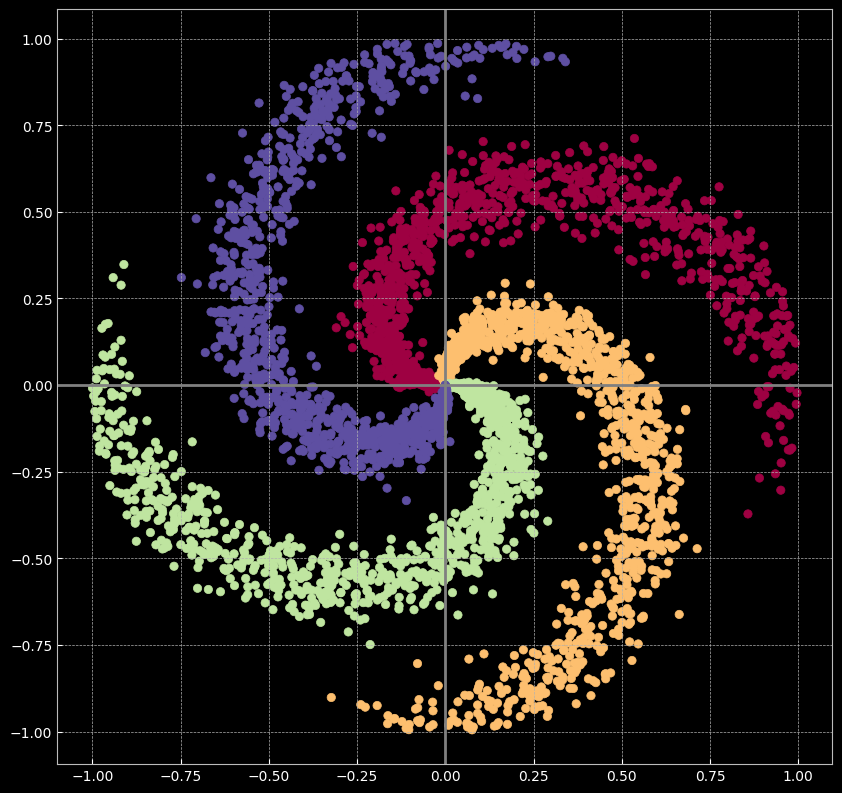

In [6]:
def plot_data(X, y):

    #plt.figure(figsize=(10,10))

    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral)

    plt.axhline(c='grey')
    plt.axvline(c='grey')
    
plot_data(X, y)

## Linear model

In [7]:
model = torch.nn.Sequential(
    torch.nn.Linear(D, h),
    torch.nn.Linear(h, C)
).to(device)

In [8]:
lossF = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [9]:
for epoch in range(1000):
    
    y_pred = model(X)
    scores, classes = torch.max(y_pred, 1)
    
    accuracy = (y == classes).sum().float() / len(y) 
    loss   = lossF(y_pred, y)
    
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (epoch, loss.item(), accuracy))
    display.clear_output(wait=True)
    
    optim.zero_grad()
    loss.backward()
    
    optim.step()

[EPOCH]: 999, [LOSS]: 0.832635, [ACCURACY]: 0.502


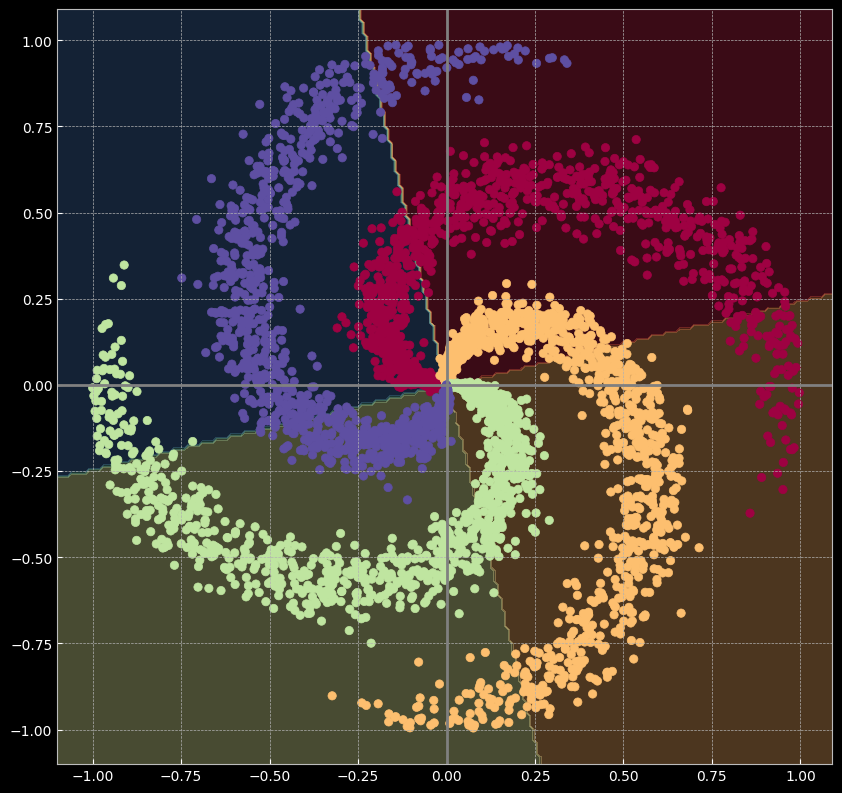

In [10]:
def plot_model(model):
    mesh = np.arange(-1.1, 1.1, 0.01, dtype=np.float32)
    xx, yy = np.meshgrid(mesh, mesh)
    data = torch.from_numpy(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1 ))

    with torch.no_grad():
        y_pred  = model(data).detach()

    classes = np.argmax(y_pred, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, classes, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)
    
plot_model(model)

## Non-Linearity

In [11]:
model = torch.nn.Sequential(
    torch.nn.Linear(D, h),
    torch.nn.ReLU(),
    torch.nn.Linear(h, C)
).to(device)

In [12]:
lossF = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [13]:
for epoch in range(1000):
    
    y_pred = model(X)
    scores, classes = torch.max(y_pred, 1)
    
    accuracy = (y == classes).sum().float() / len(y) 
    loss   = lossF(y_pred, y)
    
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (epoch, loss.item(), accuracy))
    display.clear_output(wait=True)
    
    optim.zero_grad()
    loss.backward()
    
    optim.step()

[EPOCH]: 999, [LOSS]: 0.226299, [ACCURACY]: 0.947


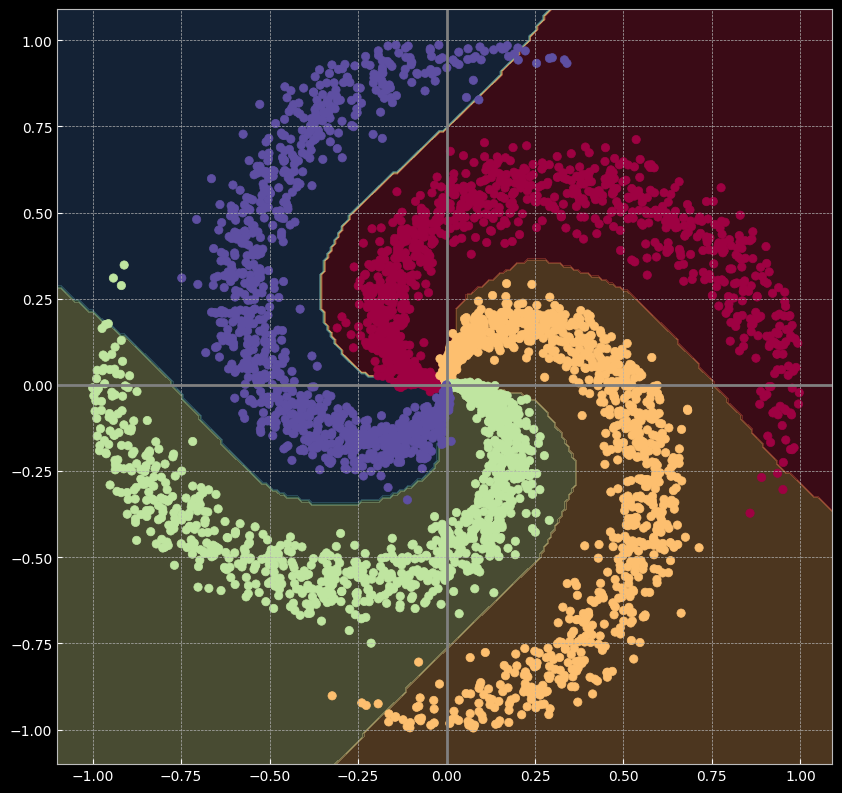

In [14]:
plot_model(model)